# **Automatidata Project -**
#### **[Understanding the Data & EDA]**

Automatidata is a fictional data consulting firm that transforms its clients' existing and unused data into customer-facing tools, interactive dashboards, strategic business insights and business solutions to help solve business problems.

In this scenario, we work for Automatidata's client - The New York City Taxi and Limousine Commission (TLC). The goal of this stage of the project is to -

1) Understand the data and perform some basic data cleaning

2) Conduct EDA (Exploratory Data Analysis)

The above steps are an important part of building a Machine-Learning model for TLC, which will aim to predict taxi cab fares before a ride. This is Automatidata's ultimate project goal.

Note—We are assuming that TLC accepted Automatidata's Business Project Proposal, after which we received data from New York City's TLC to kickstart this project. Also, note that the dataset being used in this project was intended for pedagogical purposes and is not representative of New York City taxi cab rider behaviour.

# **1) Understanding the Data**

In [1]:
# Importing the required libraries and packages
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [2]:
# Loading the dataset to work with
df = pd.read_csv(r"D:\Files On This Laptop (Not Cloud)\xps 16 9640\Documents\Data Analytics Career Requirements\PORTFOLIO ESSENTIALS\2017_Yellow_Taxi_Trip_Data.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

In [4]:
df.head(20)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.00,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.00,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.00,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.00,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.00,0.3,17.80
5,23345809,2,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.00,0.3,12.36
6,37660487,2,05/03/2017 7:04:09 PM,05/03/2017 8:03:47 PM,1,12.83,1,N,79,241,1,47.5,1.0,0.5,9.86,0.00,0.3,59.16
7,69059411,2,08/15/2017 5:41:06 PM,08/15/2017 6:03:05 PM,1,2.98,1,N,237,114,1,16.0,1.0,0.5,1.78,0.00,0.3,19.58
8,8433159,2,02/04/2017 4:17:07 PM,02/04/2017 4:29:14 PM,1,1.20,1,N,234,249,2,9.0,0.0,0.5,0.00,0.00,0.3,9.80
9,95294817,1,11/10/2017 3:20:29 PM,11/10/2017 3:40:55 PM,1,1.60,1,N,239,237,1,13.0,0.0,0.5,2.75,0.00,0.3,16.55


**Data Dictionary Given By the client TLC to Automatidata -**

1) The `Unnamed` column is the - Trip identification number.
2) The `VendorID` column has - A code indicating the TPEP provider that provided the record.
   
   1 = Creative Mobile Technologies, LLC
   
   2 = VeriFone Inc.
   
4) The `tpep_pickup_datetime` is - The date and time when the meter was engaged.
5) The `tpep_dropoff_datetime` is - The date and time when the meter was disengaged.
6) The `Passenger_count` is - The number of passengers in the vehicle. This is a driver-entered value.
7) The `Trip_distance` is - The elapsed trip distance in miles the taximeter reports.
8) The `PULocationID` is - the TLC Taxi Zone in which the taximeter was engaged
9) The `DOLocationID` column is - TLC Taxi Zone in which the taximeter was disengaged
10) The `RateCodeID` column has an int64 datatype. The codes (The final rate code in effect at the end of the trip.) given below mean the following -

    1 = Standard rate

    2 = JFK

    3 = Newark

    4 = Nassau or Westchester

    5 = Negotiated fare

    6 = Group ride
   
12) The `Store_and_fwd_flag` - This flag indicates whether the trip record was held in vehicle memory before being sent to the vendor, aka “store and       forward,”  because the vehicle did not connect to the server.
    
    Y = store and forward trip
    
    N = not a store and forward trip
    
14) The `Payment_type` column contains data of a numeric code signifying how the passenger paid for the trip.

    1 = Credit card

    2 = Cash

    3 = No charge

    4 = Dispute

    5 = Unknown

    6 = Voided trip

16) The `Fare_amount` column has data on the time-and-distance fare calculated by the meter.
17) The `extra` column has data on the miscellaneous extras and surcharges. This only includes the Dollar 0.50 and Dollar 1 rush hour and        overnight charges.
18) The `mta_tax` column - Dollar 0.50 MTA tax that is automatically triggered based on the metered rate in use.
19) The `improvement_surcharge` column - Dollar 0.30 improvement surcharge assessed trips at the flag drop. The  improvement surcharge began being          levied in 2015.
20) The `tip_amount` column - This field is automatically populated for credit card tips. Cash tips are not included.
21) The `tolls_amount` column - Total amount of all tolls paid in the trip.
22) The `total_amount` column - The total amount charged to passengers. Does not include cash tips. 

In [5]:
df.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


In [6]:
df.shape

(22699, 18)

In [7]:
df.drop_duplicates().shape

(22699, 18)

In [8]:
df.isnull().sum()

Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

In [9]:
pd.notna(df)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22694,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
22695,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
22696,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
22697,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


#### **Some Analysis** - 

**1) Regarding the Shape, Duplicates and Null Values in the Dataset - df  -**

From the `df.shape` and `df.drop_duplicates().shape` functions' output, it is evident that there are **22,699** rows and **18** columns in the dataset df. If we compare this output of the number of rows and columns to the output of the `df.info()` function, it is evident that the non-null value count of all the 18 columns is equal to the number of non-duplicate rows in the dataset that is, 22,699. This means we do not have any missing data or null values to deal with. To just verify the same, I ran the code df.isnull().sum() and all the columns show 0 as the value of the number of nulls. Hence there are no nulls. 

**2) Regarding the Datatypes of the columns in df  -**

1) The Unnamed column, VendorID column, passenger_count column, RatecodeID, PULocationID, DOLocationID and the payment_type columns are all of the `int64` datatype (Total of 7 columns)
2) The trip_distance column, fare_amount, extra, mta_tax, trip_amount, tolls_amount, improvemnt_surchare and total_amount columns are all of the `float64` datatype (Total of 8 columns)
3) tpep_pickup_datetime, tpep_dropoff_datetime and store_and_fwd_flag columns are of the `object` datatype.

 **3) Regarding the Describe Output  -**

**Negative Fare Amount**

When reviewing the df.describe() function's output, The minimum fare amount of **-120.00**, minimum extra amount of **-1.00**, mta tax of **-0.50**, Improvement surcharge of **-0.30**, and the total amount of **-120.30** stand out. Minus values for a fare do not seem to be possible but can be possible in the following scenarios -

1) If a ride service offers a discount or voucher or a credit greater than the actual fare amount, the system may display a negative fare temporarily. Example, a fare of 1000 dollars with a voucher of 1200 dollars might result in a displayed balance of -20 dollars
2) A negative entry might have occured due to incorrect entries in fare calculations.
3) If a fare is overcharged to the customer and requires adjustment, a negative amount maybe shown in the system as the refund to be issued to the customer/user.
4) A ride may show negative balances if cashback or credits are applied to the user's account for future rides.
5) Incorrect handling of curreny exchange rates or sign conventions during cross-border payments could result in a negative fare.

But again, in standard operations, an overpayment or refund in case of point number 3, is processed separately and is not expected to show up as a negative fare.

**TPEP Provider**

When we Look at the Maximum value, it is evident that most taxis use the **Verifone Inc.** TPEP provider for their meter. 

**0 Passenger Count** 

The minimum passenger count of 0 indicates that - 

1) They are riding empty because the route or service may have been available to the passengers during that time period but no one utilized that           service.
2) The cab is running empty during the peak hours or there were no passengers during a particular trip.
3) Data collection issue could be possible.
4) Certain cabs may run empty for running test routes or carrying other goods apart from people for instance.
5) `The cab might be running empty due to low passenger demand` - This definitely looks like a point to consider.
6) `Could also indicate passenger ride cancellations` - This is also a point to definitelty consider.

**0 Trip Distance**

1) May indicate passenger trip cancellations by a passenger because of which the vehicle did not move.
2) faulty GPS systems in the cab may have failed to record the distance

**NOTE -** **`ZERO`** counts need to be analysed and looked into properly as they may either be important outliers to take into consideration for the above mentioned reasons, or they may also indicate values that may not be relevant to analysis which can be filtered out.

**Payment_Type**

Maximum payments seem to be disputed as the Maximum payment type shows up as **`4`** whose code when refered to in the data dictionary indicate **`Dispute`**

**RatecodeID**

The maximum RatecodeID shows up as **`99`** when there are only **6** categories. This seems to be an error in the data and must be taken into consideration during EDA. 

# **2) Investigating the Variables**

The goal of this part of the Jupyter Notebook is to sort and interpret the data based on the two variables `trip_distance` and `total_amount`. 

In [10]:
# Sorting the data by trip distance in descending order (Maximum to Minimum value)
df_sorted_trip_distance = df.sort_values(by=['trip_distance'], ascending=False)['trip_distance']
df_sorted_trip_distance.head(20)

9280     33.96
13861    33.92
6064     32.72
10291    31.95
29       30.83
18130    30.50
5792     30.33
15350    28.23
10302    28.20
2592     27.97
20612    27.88
1908     27.34
20545    27.20
4138     26.86
15169    26.54
1496     26.39
7217     26.20
19483    26.12
908      26.12
4715     25.86
Name: trip_distance, dtype: float64

In [11]:
# Sorting the Data by total amount and printing the top 20 values. 
df_sorted_total_amt = df.sort_values(by=['total_amount'], ascending=False)['total_amount']
df_sorted_total_amt.head(20)

8476     1200.29
20312     450.30
13861     258.21
12511     233.74
15474     211.80
6064      179.06
16379     157.06
3582      152.30
11269     151.82
9280      150.30
1928      137.80
10291     131.80
6708      126.00
11608     123.30
908       121.56
7281      120.96
18130     119.31
13621     115.94
13359     111.95
29        111.38
Name: total_amount, dtype: float64

In [12]:
df_sorted_total_amt.tail(20)

14283      0.31
19067      0.30
10506      0.00
4402       0.00
22566      0.00
5722       0.00
1646      -3.30
314       -3.80
18565     -3.80
5758      -3.80
10281     -4.30
5448      -4.30
4423      -4.30
8204      -4.80
20317     -4.80
11204     -5.30
14714     -5.30
20698     -5.80
17602     -5.80
12944   -120.30
Name: total_amount, dtype: float64

This part of the Jupyter Notebook aims at understanding the payment type, the mean amount of tip paid through the top two modes of payment, the prefered vendor for payment and the passenger count corresponding to their mode of payment. 

In [13]:
# The count of each payment type that is represented in the data. 
df['payment_type'].value_counts()

payment_type
1    15265
2     7267
3      121
4       46
Name: count, dtype: int64

**According to the data, the payment method is encoded as follows:**

1)   **1 = Credit card**
2)   **2 = Cash**
3)   **3 = No charge**
4)   **4 = Dispute**
5)   **5 = Unknown**
6)   **6 = Voided trip**

In [14]:
# Calculating the average tip for trips paid with a Credit Card
avg_cc_tip = df[df['payment_type']==1]['tip_amount'].mean()
print('The Average Credit Card tip is -', avg_cc_tip)

The Average Credit Card tip is - 2.7298001965280054


In [15]:
# Calculating the average tip for trips paid with Cash
avg_cash_tip = df[df['payment_type']==2]['tip_amount'].mean()
print('The Average Cash tip is -' ,avg_cash_tip)

The Average Cash tip is - 0.0


In [16]:
df['VendorID'].value_counts()

VendorID
2    12626
1    10073
Name: count, dtype: int64

**In the above output, there are two vendor IDs 1 and 2. They represent the following :**

1) **1 - Creative Mobile Technologies, LLC**

2) **2 - VeriFone Inc.**

In [17]:
df.groupby(['VendorID']).mean(numeric_only=True)[['total_amount']]

,total_amount
VendorID,
1,16.298119
2,16.320382


In [18]:
# Filtering the data for credit card payments only and then from this filtered data, filtering the credit-card-only data for passenger count only
cc_payments_data = df[df['payment_type']==1]
cc_payments_data['passenger_count'].value_counts()

passenger_count
1    10977
2     2168
5      775
3      600
6      451
4      267
0       27
Name: count, dtype: int64

In [19]:
# Calculating the average tip amount for each passenger count (Credit Card payments only)
cc_payments_data.groupby(['passenger_count']).mean(numeric_only=True)[['tip_amount']]

,tip_amount
passenger_count,
0,2.610370
1,2.714681
2,2.829949
3,2.726800
4,2.607753
5,2.762645
6,2.643326


#### **NYC's Trip Data Summary -**

From the analysis till now, it is pretty much evident that the two most important variables for building a predictive Machine Learning model for the client NYC's TLC would be `trip_distance` and `total_amount` because these are the only two variables which show a complete picture of the taxi cab rides. 

Based on this base, Exploratory Data Analysis (EDA) has been done using Python in this Jupyter Notebook. Refer below.  

# **3) Exploratory Data Analysis (EDA), Visualizations and Evaluating Results**

This part of the Jupyter Notebook aims at - 
1) Data Exploration
2) Building Data Visualizations (which are even visually impaired-friendly) both in this notebook and on Tableau
3) Evaluating and sharing the results. 

In [20]:
# Converting the `tpep_pickup_datetime` and `tpep_dropoff_datetime` columns to datetime
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

**TRIP DISTANCE**

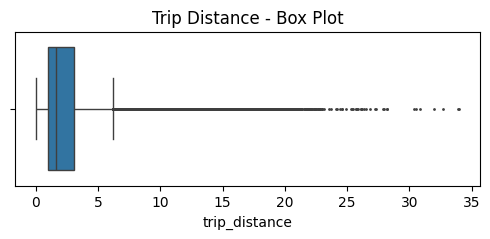

In [21]:
# Creating a Box Plot of `trip_distance`
plt.figure(figsize=(6,2))
plt.title("Trip Distance - Box Plot")
sns.boxplot(data=None, x=df['trip_distance'], fliersize=1);

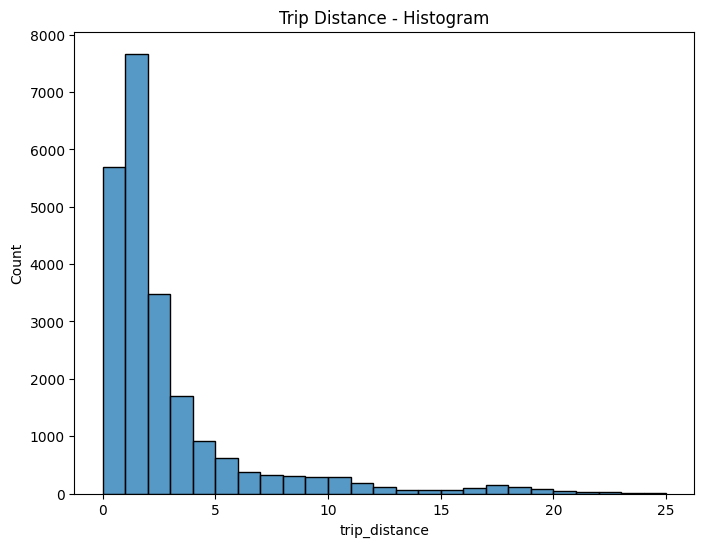

In [22]:
# Creating a Histogram of `trip_distance` 
plt.figure(figsize=(8,6))
plt.title("Trip Distance - Histogram")
sns.histplot(df['trip_distance'], bins=range(0,26,1));

#### **Some Analysis -**

Majority of the trips were journeys of less than 2 miles. It is observed that the number of trips decreases steeply as the trip distance increases beyond 2 miles. 

**TOTAL AMOUNT**

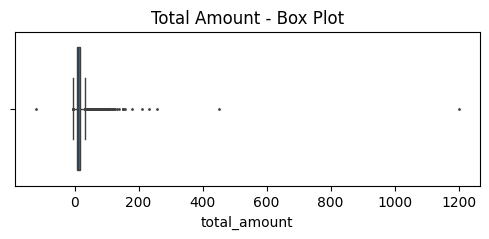

In [23]:
# Creating a Box Plot of `total_amount`
plt.figure(figsize=(6,2))
plt.title("Total Amount - Box Plot")
sns.boxplot(x=df['total_amount'], fliersize=1);

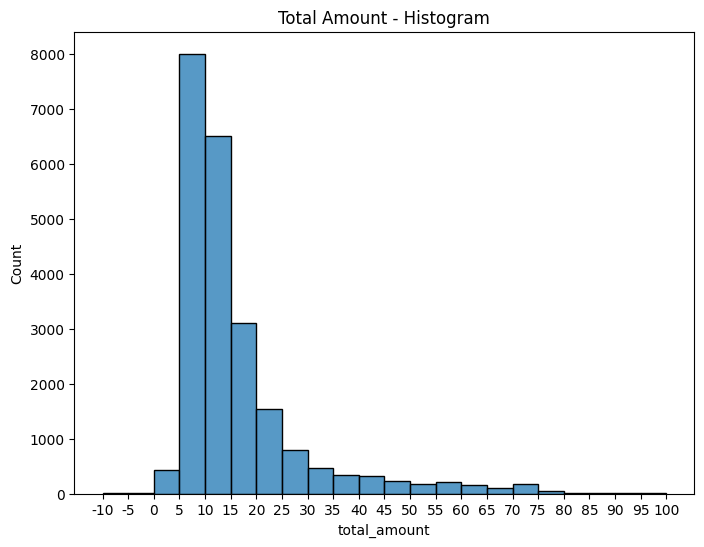

In [24]:
# Creating a Histogram of `total_amount`
plt.figure(figsize=(8,6))
plt.title("Total Amount - Histogram")
ax = sns.histplot(df['total_amount'], bins=range(-10, 101, 5)) 
ax.set_xticks(range(-10, 101, 5))
ax.set_xticklabels(range(-10, 101, 5));

#### **Some Analysis -**

The total cost of each trip has a distribution that skews right as seen in the above chart, with most costs falling in the $5-15 range. 

**TIP AMOUNT**

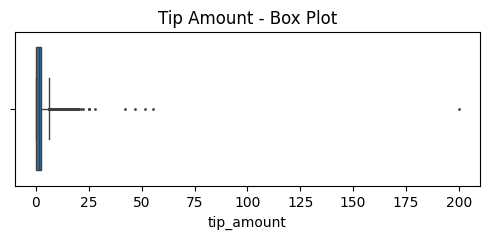

In [25]:
# Creating a Box Plot of the `tip_amount`
plt.figure(figsize=(6,2))
plt.title("Tip Amount - Box Plot")
sns.boxplot(x=df['tip_amount'], fliersize=1);

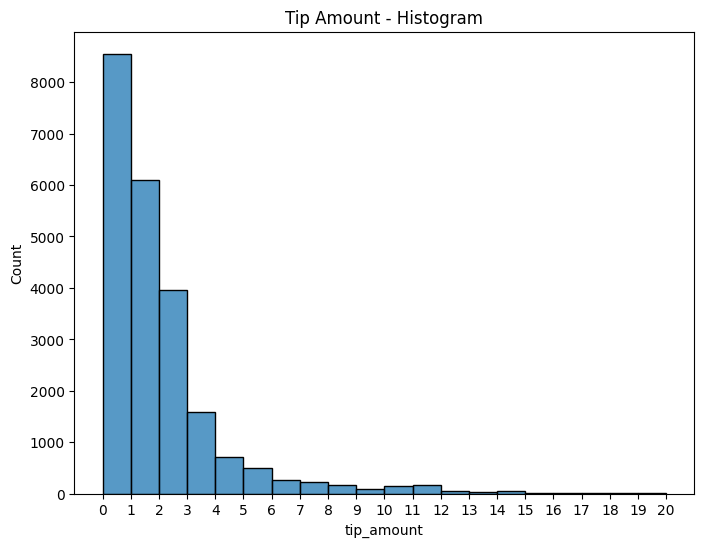

In [26]:
# Creating a Histogram of the `tip_amount` 
plt.figure(figsize=(8,6))
plt.title("Tip Amount - Histogram")
ax = sns.histplot(x=df['tip_amount'], bins=range(0,21,1))
ax.set_xticks(range(0,21,1))
ax.set_xticklabels(range(0,21,1));

#### **Some Analysis -**

The distribution for tip amount is right-skewed, with nearly all the tips in the $0-3 range.

**TIP AMOUNT BY VENDOR**

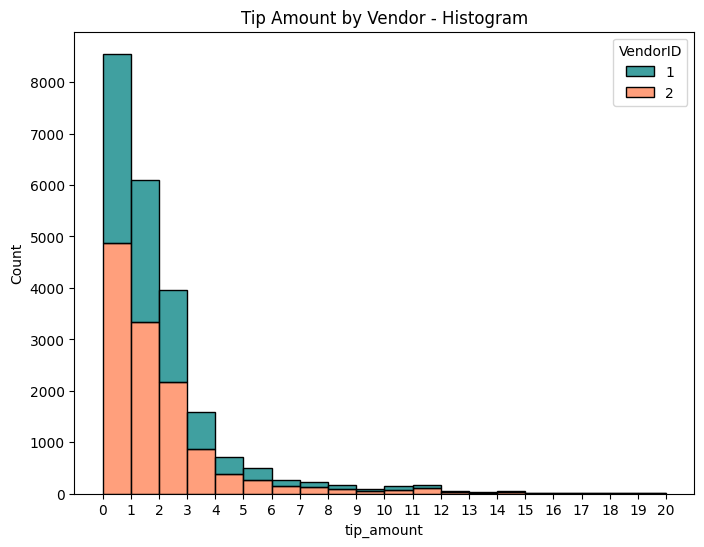

In [27]:
# Creating a histogram of the `tip_amount` by vendor
plt.figure(figsize=(8,6))
plt.title("Tip Amount by Vendor - Histogram")
ax = sns.histplot(data=df,
                  x='tip_amount',
                  bins=range(0,21,1),
                  hue='VendorID', 
                  multiple='stack',
                  palette=['teal','coral'])
ax.set_xticks(range(0,21,1))
ax.set_xticklabels(range(0,21,1));

#### **Some Analysis -**

Separating the tip amount by vendor reveals that there are no noticeable aberrations in the distribution of tips between the two vendors in the dataset. Vendor two has a slightly higher share of the rides, and this proportion is approximately maintained for all tip amounts as evidently visible in the above stacked histogram. 

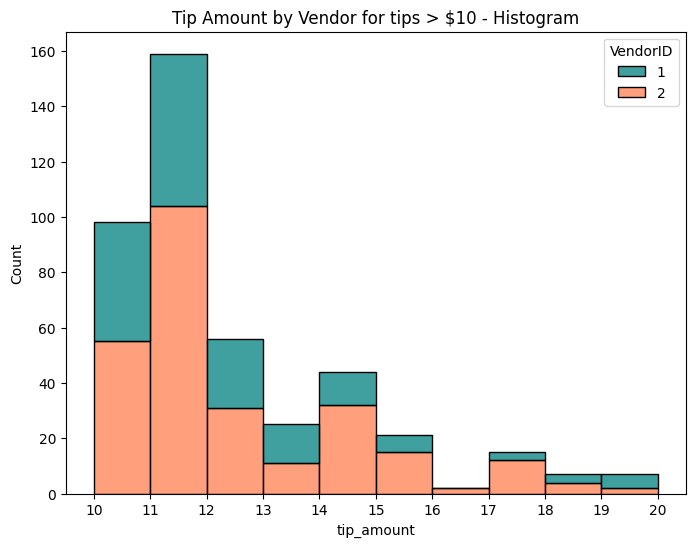

In [28]:
# Creating a histogram of the `tip_amount` by vendor for tips > $10
tips_over_10 = df[df['tip_amount'] > 10]
plt.figure(figsize=(8,6))
plt.title("Tip Amount by Vendor for tips > $10 - Histogram")
ax = sns.histplot(data=tips_over_10,
                  x='tip_amount',
                  bins=range(10,21,1),
                  hue='VendorID',
                  multiple='stack',
                  palette=['teal','coral'])
ax.set_xticks(range(10,21,1))
ax.set_xticklabels(range(10,21,1));

#### **Some Analysis -**

The proportions are maintained even at these higher tip amounts, with the exception being at highest extremity, but this is not noteworthy due to the low sample size at these tip amounts.

**PASSENGER COUNT**

In [29]:
df['passenger_count'].value_counts()

passenger_count
1    16117
2     3305
5     1143
3      953
6      693
4      455
0       33
Name: count, dtype: int64

#### **Some Analysis -**

Nearly two thirds of the rides were single occupancy, though there were still nearly 700 rides with as many as six passengers. Also, there are 33 rides with an occupancy count of zero, which doesn't make sense. These would likely be dropped unless a reasonable explanation can be found for them.

In [30]:
# Calculating mean tips by passenger count
mean_tips_by_passenger_count = df.groupby(['passenger_count']).mean(numeric_only=True)[['tip_amount']]
mean_tips_by_passenger_count

,tip_amount
passenger_count,
0,2.135758
1,1.848920
2,1.856378
3,1.716768
4,1.530264
5,1.873185
6,1.720260


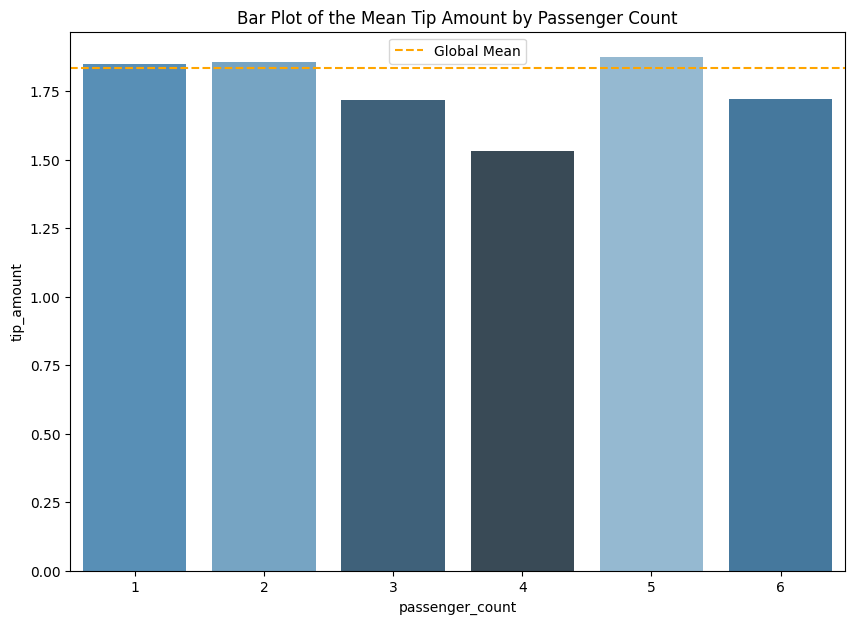

In [31]:
# Creating a Bar Plot for Mean tips by `passenger_count`

data = mean_tips_by_passenger_count.tail(-1)
pal = sns.color_palette("Blues_d", len(data))
rank = data['tip_amount'].argsort().argsort()
plt.figure(figsize=(10,7))
plt.title("Bar Plot of the Mean Tip Amount by Passenger Count")

# Converting palette to a list 
pal = list(np.array(pal[::-1])[rank])

# Creating the bar plot using seaborn
ax = sns.barplot(x=data.index,
                 y=data['tip_amount'],
                 hue=data.index,
                 palette=pal,
                 dodge=False,
                 legend=False)

# Adding the horizontal line and legend
ax.axhline(df['tip_amount'].mean(), ls='--', color='orange', label='Global Mean')
ax.legend();

#### **Some Analysis -**

The mean tip amount varies very little by passenger count although it does drop noticeably for 4-passenger_count rides. But this higher degree of fluctuation is expected because the rides with 4 passengers were least plentiful in the dataset as clearly visible from the mean_tips_by_passenger data frame (aside from the rides with 0 passengers)

**INCORPORATING MONTHS & DAYS INTO THE DATAFRAME**

In [32]:
# Creating `Month` and `Day` columns 
df['Month'] = df['tpep_pickup_datetime'].dt.month_name()
df['Day'] = df['tpep_pickup_datetime'].dt.day_name()

**PLOTTING THE TOTAL RIDES BY MONTH BAR PLOT**

In [33]:
# We begin the process of plotting the total rides in a bar plot by first of all calculating the total ride count by month. 
monthly_rides = df['Month'].value_counts()
monthly_rides

Month
March        2049
October      2027
April        2019
May          2013
January      1997
June         1964
December     1863
November     1843
February     1769
September    1734
August       1724
July         1697
Name: count, dtype: int64

From the above output it is evident that the months are not in order. Hence the months will be re-ordered using the code below.

In [34]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

monthly_rides = monthly_rides.reindex(index=month_order)
monthly_rides

Month
January      1997
February     1769
March        2049
April        2019
May          2013
June         1964
July         1697
August       1724
September    1734
October      2027
November     1843
December     1863
Name: count, dtype: int64

In [35]:
# Show the Index
monthly_rides.index

Index(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype='object', name='Month')

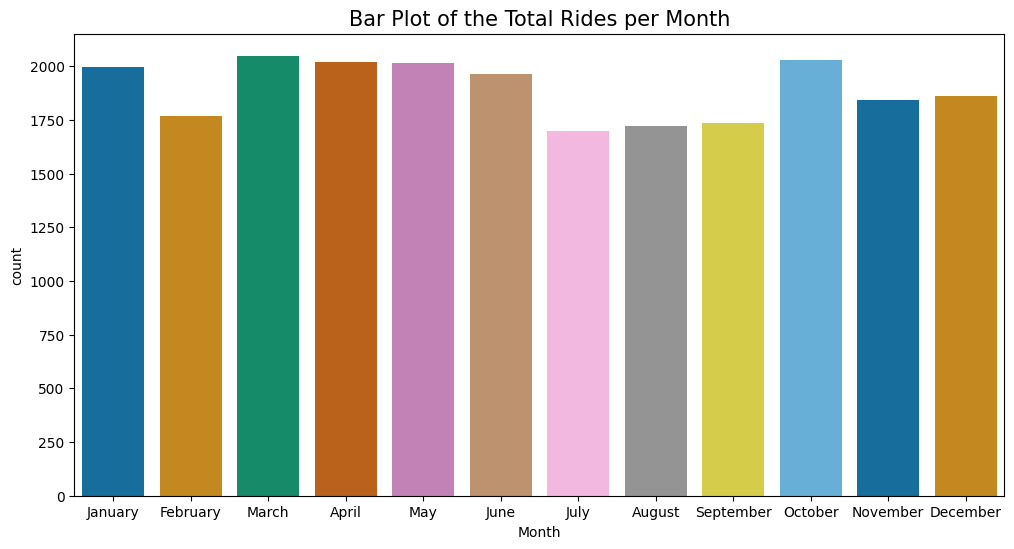

In [36]:
# Creating a Bar Plot of the total rides per month

plt.figure(figsize=(12,6))
plt.title("Bar Plot of the Total Rides per Month", fontsize=15)

# To set a colorful palette
palette = sns.color_palette("colorblind", len(monthly_rides))

# Plotting the bar graph
ax = sns.barplot(x=monthly_rides.index,
                 y=monthly_rides,
                 hue=monthly_rides.index,
                 palette=palette,
                 dodge=False,
                 legend=False)
ax.set_xticks(range(len(month_order)))
ax.set_xticklabels(month_order)
plt.show()

#### **Some Analysis -**

Monthly rides are fairly consistent, with notable dips in the summer months of July, August, and September, and also in February.

**PLOTTING THE TOTAL RIDES BY DAY BAR PLOT**

In [37]:
# Repeating the above process, this time for rides by the day
daily_rides = df['Day'].value_counts()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_rides = daily_rides.reindex(index=day_order)
daily_rides

Day
Monday       2931
Tuesday      3198
Wednesday    3390
Thursday     3402
Friday       3413
Saturday     3367
Sunday       2998
Name: count, dtype: int64

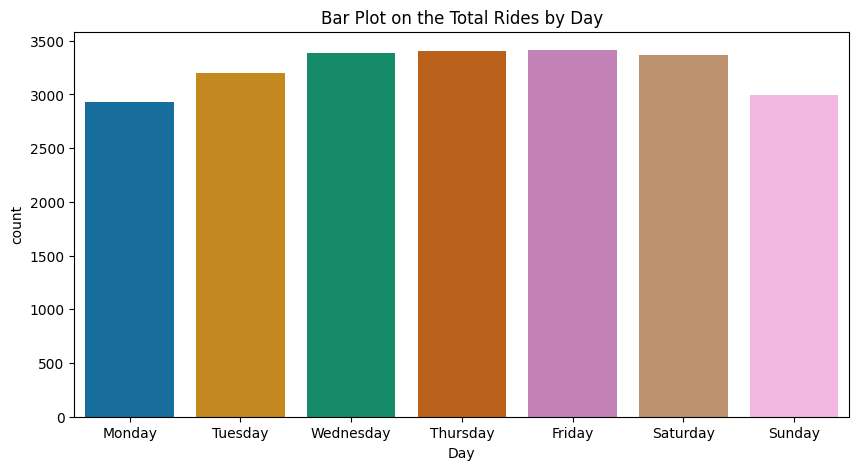

In [38]:
# Creating the bar plot for total rides by day
plt.figure(figsize=(10,5))
plt.title("Bar Plot on the Total Rides by Day")
palette = sns.color_palette("colorblind", len(daily_rides))
ax = sns.barplot(x=daily_rides.index,
                 y=daily_rides,
                 hue=daily_rides.index,
                 palette=palette,
                 dodge=False,
                 legend=False)
ax.set_xticks(range(len(day_order)))
ax.set_xticklabels(day_order)
plt.show()

#### **Some Analysis -**

Suprisingly, Wednesday through Saturday had the highest number of daily rides, while Sunday and Monday had the least.

**ALL ABOUT THE REVENUE**

**Total Revenue By Day of the Week -**

In [39]:
# Preparing the data to plot the Total Revenue by Day of the week on a chart 
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
total_amount_day = df.groupby('Day').sum(numeric_only=True)[['total_amount']]
total_amount_day = total_amount_day.reindex(index=day_order)
total_amount_day

,total_amount
Day,
Monday,49574.37
Tuesday,52527.14
Wednesday,55310.47
Thursday,57181.91
Friday,55818.74
Saturday,51195.40
Sunday,48624.06


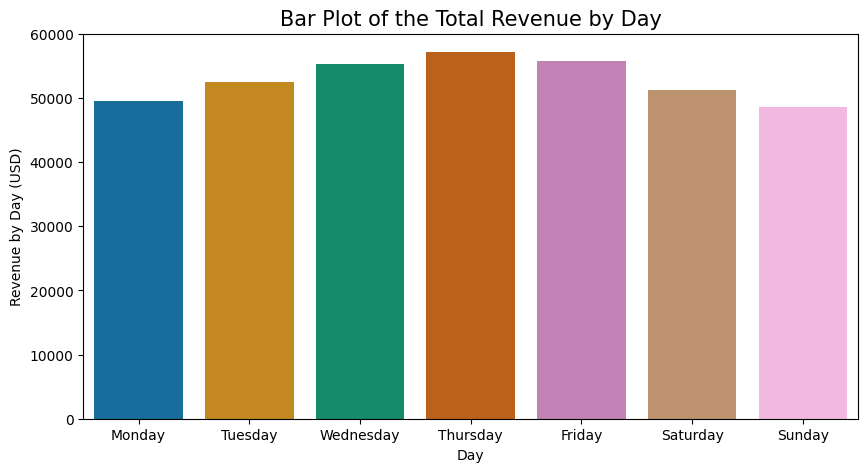

In [40]:
# Creating a Bar Plot of the Total Revenue by Day
plt.figure(figsize=(10,5))
plt.title("Bar Plot of the Total Revenue by Day", fontsize=15)
palette = sns.color_palette("colorblind", len(total_amount_day))
ax = sns.barplot(x=total_amount_day.index,
                 y=total_amount_day['total_amount'],
                 hue=total_amount_day.index,
                 palette=palette,
                 dodge=False,
                 legend=False)
ax.set_xticks(range(len(day_order)))
ax.set_xticklabels(day_order)
ax.set_ylabel("Revenue by Day (USD)")
plt.show();            

#### **Some Analysis -**

Thursday had the highest gross revenue of all days, and Sunday and Monday had the least. Interestingly, although Saturday had only 35 fewer rides than Thursday (3402 - 3367 = 35), its gross revenue was ~$6,000 less than Thursday's—more than a 10% drop.

**Total Revenue by Month -**

In [41]:
# Preparing the data to plot the Total Revenue by Month on a chart
total_amount_month = df.groupby('Month').sum(numeric_only=True)[['total_amount']]
total_amount_month = total_amount_month.reindex(index=month_order)
total_amount_month

,total_amount
Month,
January,31735.25
February,28937.89
March,33085.89
April,32012.54
May,33828.58
June,32920.52
July,26617.64
August,27759.56
September,28206.38


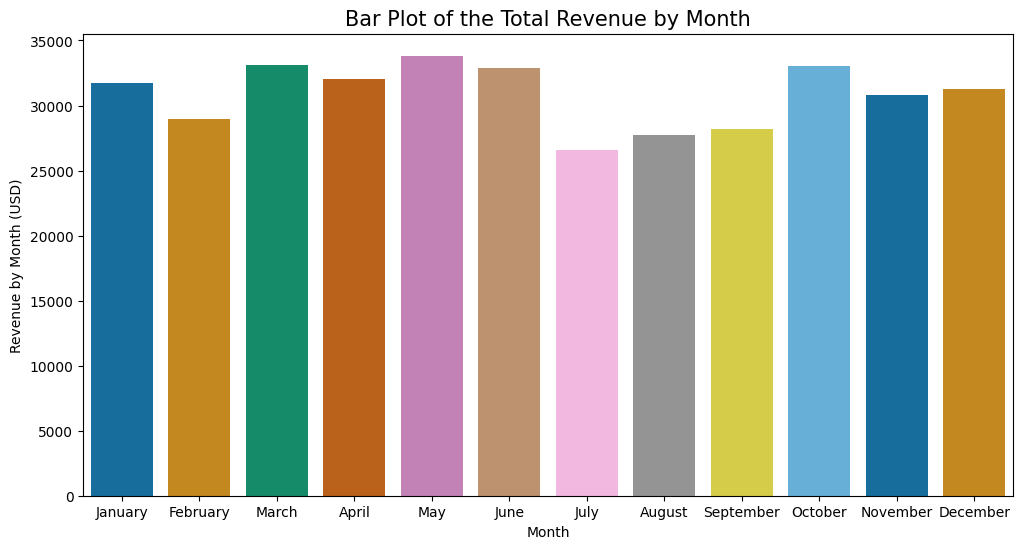

In [42]:
# Creating a Bar Plot by the Total Revenue by Month
plt.figure(figsize=(12,6))
plt.title("Bar Plot of the Total Revenue by Month", fontsize=15)
palette = sns.color_palette("colorblind", len(total_amount_month))
ax = sns.barplot(x=total_amount_month.index,
                 y=total_amount_month['total_amount'],
                 hue=total_amount_month.index,
                 palette=palette,
                 dodge=False,
                 legend=False)
ax.set_xticks(range(len(month_order)))
ax.set_xticklabels(month_order)
ax.set_ylabel("Revenue by Month (USD)")
plt.show();

#### **Some Analysis -**

Monthly revenue generally follows the pattern of monthly rides, with noticeable dips in the summer months of July, August, and September, and also one in February.

https://public.tableau.com/views/NYCsTaxiandLimousineCommissionTLCDataDashboard/DashboardofNewYorkCitysTLCData?:language=en-GB&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link 

The above link leads to a Tableau Dashboard showing a scatter plot of the `trip distance` versus the `total amount` paid. 

**Also dropping down the link to my Tableau Portfolio for you to view -** 
https://public.tableau.com/app/profile/pooja.shankavaram/vizzes

**MEAN TRIP DISTANCE BY DROP-OFF LOCATION**

In [43]:
# Calculating the mean trip distance for each drop-off location
distance_by_dropoff = df.groupby('DOLocationID').mean(numeric_only=True)[['trip_distance']]

# Sorting the results in descending order by mean trip distance
distance_by_dropoff = distance_by_dropoff.sort_values(by='trip_distance')
distance_by_dropoff

,trip_distance
DOLocationID,
207,1.200000
193,1.390556
237,1.555494
234,1.727806
137,1.818852
...,...
51,17.310000
11,17.945000
210,20.500000


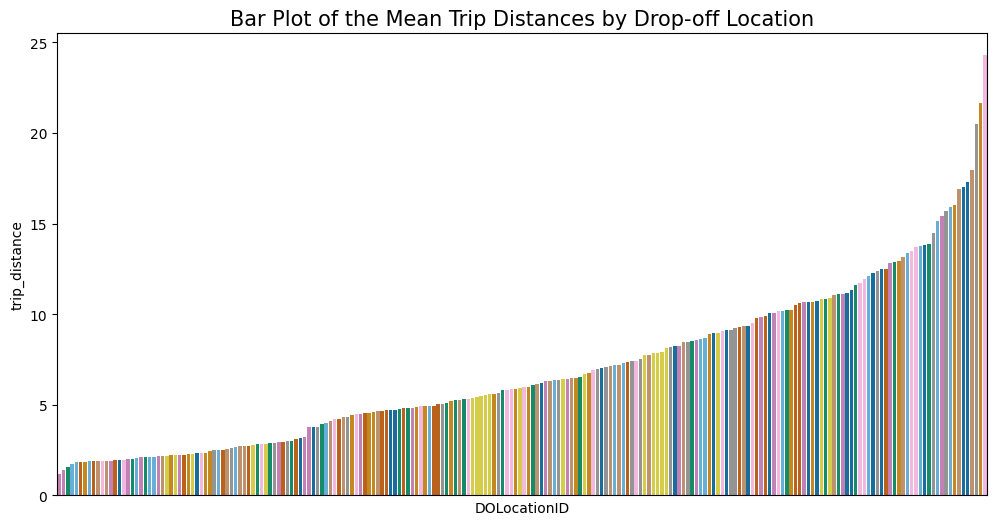

In [44]:
# Creating a Bar Plot of the Mean Trip Distances by Dropoff Location in ascending order by distance
plt.figure(figsize=(12,6))
plt.title("Bar Plot of the Mean Trip Distances by Drop-off Location", fontsize=15)
palette = sns.color_palette("colorblind", len(distance_by_dropoff))
ax = sns.barplot(x=distance_by_dropoff.index,
                 y=distance_by_dropoff['trip_distance'],
                 order=distance_by_dropoff.index,
                 hue=distance_by_dropoff.index,
                 palette=palette,
                 dodge=False,
                 legend=False)
ax.set_xticks([])
ax.set_xticklabels([]);

#### **Some Analysis -**

The above chart represnts a characteristic curve related to the cumulative density function of a normal distribution. In other words, it indicates that the drop-off points are relatively evenly distributed over the terrain. 

**EXPERIMENT TO CONFIRM THE ABOVE ANALYSIS RESULT**

The dataset used for this project, that is, it is assumed that the fictional company Automatidata has received data from its client TLC, does not have any geographic coordinates included. So to confirm if the above analysis is correct or not, a small experiment has been conducted below and the steps have been elucidated below - 
1) The experiment aims to create a sample of coordinates from a normal distribution - in this example 1500 pairs of points from a normal distribution, that is, 3000 points, with a Mean of 10 and a Standard Deviation of 5.
2) Calculating the distance between each pair of coordinates.
3) Grouping the coordinates by endpoint and calculate the mean distance between that endpoint and all other points it was paired with.
4) Plotting the mean distance for each unique endpoint

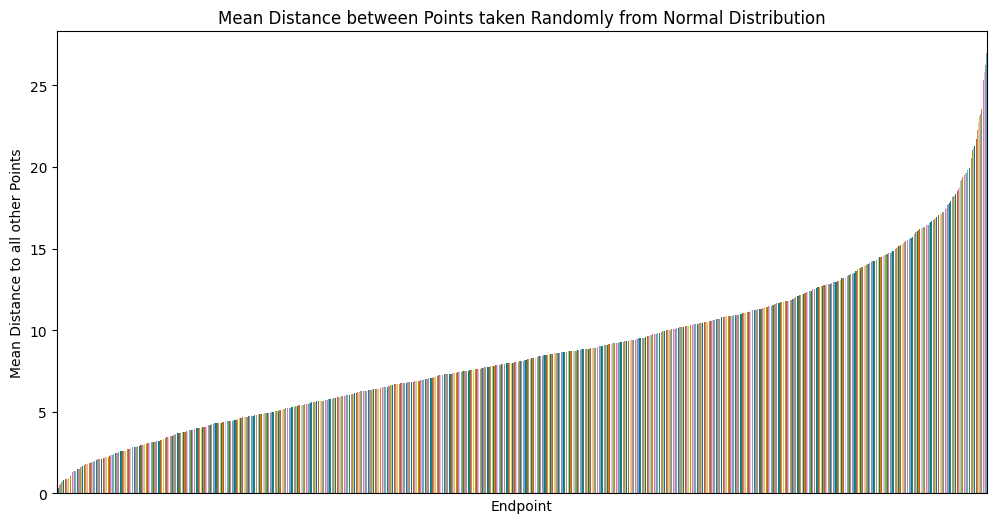

In [45]:
# Generating Random Points on a 2D Plane from a Normal Distribution 
test = np.round(np.random.normal(10, 5, (3000,2)), 1)
midway = int(len(test)/2)          # Calculate midpoint of the array of coordinates
start = test[:midway]              # Isolate first half of array ("pick-up locations")
end = test[midway:]                # Isolate second half of array ("drop-off locations")

# Calculating Euclidean distances between points in first half and second half of array
distances = (start - end)**2 
distances = distances.sum(axis=-1) 
distances = np.sqrt(distances)

# Grouping the coordinates by "drop-off location" and compute mean distance
test_df = pd.DataFrame({'start': [tuple(x) for x in start.tolist()], 
                        'end': [tuple(x) for x in end.tolist()], 
                        'distance': distances})
data = test_df[['end', 'distance']].groupby('end').mean()
data = data.sort_values(by='distance')

# Converting the index to a categorical column 
data = data.reset_index() 
data['end_str'] = data['end'].astype(str)

# Creating a Larger Color Palette 
palette_size = len(data['end_str'].unique())
large_palette = sns.color_palette("colorblind", palette_size)

# Ploting the mean distance between each endpoint ("drop-off location") and all points it connected to
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=data,
                 x='end_str', 
                 y='distance', 
                 hue='end_str', 
                 palette=large_palette, 
                 dodge=False, 
                 legend=False)
ax.set_xticklabels([]) 
ax.set_xticks([]) 
ax.set_xlabel('Endpoint') 
ax.set_ylabel('Mean Distance to all other Points') 
ax.set_title('Mean Distance between Points taken Randomly from Normal Distribution') 
plt.show();

#### **Some Analysis -**

From the above output, we can say that it looks nearly identical to the previous chart which shows the Mean Trip Distances by drop-off location. If we look at the previous chart it does not look as smooth as the output above. This means that there was no even distribution of rides to each drop-off point. The next section examines those uneven parts of the curve. 

**HISTOGRAM OF RIDES BY DROP-OFF LOCATION**

Before we proceed ahead with the plotting of the histogram, we will figure out if the drop-off location IDs are consecutively numbered. For example, 1,2,3,4,5 instead of 1,3,5,7,8. 

In [46]:
# Checking if all drop-off locations are consecutively numbered
df['DOLocationID'].max() - len(set(df['DOLocationID']))

np.int64(49)

This means that there are **`49`** numbers that do not represnt a drop-off location. 

In order to prevent the spaces that these missing numbers would create, we sort the unique drop-off location values and then convert them to strings. This will make the histplot function display all the bars of the histogram directly next to each other. 

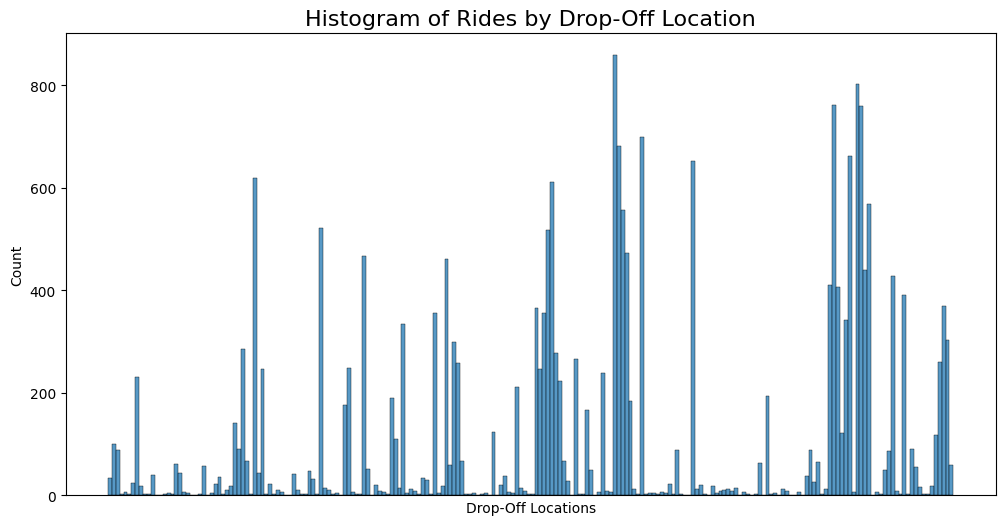

In [47]:
plt.figure(figsize=(12,6))
sorted_drop_offs = df['DOLocationID'].sort_values()
sorted_drop_offs = sorted_drop_offs.astype(str)
sns.histplot(sorted_drop_offs, bins=range(0, df['DOLocationID'].max()+1, 1))
plt.xticks([])
plt.xlabel("Drop-Off Locations")
plt.title("Histogram of Rides by Drop-Off Location", fontsize=16);

**Some Analysis -**

From the above data of the many drop-off locations that are seen, it is evident that disproportionate number of locations receive majority of the traffic while all the rest get reletively fewer trips. It's likely that these high-traffic locations are near popular tourist attractions like the Empire State Building or Times Square, airports, and train and bus terminals. However, it would have been helpful to know the location that each ID corresponds with. Unfortunately, this is not available in the given data.

# **SOME OVERALL ANALYSIS & CONCLUSIONS**

#### **1) Negative Fare Amount**

When reviewing the df.describe() function's output, The minimum fare amount of **-120.00**, minimum extra amount of **-1.00**, mta tax of **-0.50**, Improvement surcharge of -0.30, and the total amount of **-120.30** stand out. Minus values for a fare do not seem to be possible but can be possible in the following scenarios -

1) If a ride service offers a discount or voucher or a credit greater than the actual fare amount, the system may display a negative fare temporarily. For example, a fare of 1000 dollars with a voucher of 1200 dollars might result in a displayed balance of -20 dollars
2) A negative entry might have occurred due to incorrect entries in fare calculations.
3) If a fare is overcharged to the customer and requires adjustment, a negative amount maybe shown in the system as the refund to be issued to the customer/user.
4) A ride may show negative balances if cashback or credits are applied to the user's account for future rides.
5) Incorrect handling of currency exchange rates or sign conventions during cross-border payments could result in a negative fare.

But again, in standard operations, an overpayment or refund in the case of point number 3, is processed separately and is not expected to show up as a negative fare.

#### **2) 0 Trip Distance**

1) This may indicate passenger trip cancellations by a passenger because of which the vehicle did not move.
2) faulty GPS systems in the cab may have failed to record the distance

**NOTE -** ZERO counts need to be analysed and looked into properly as they may either be important outliers to take into consideration for the above-mentioned reasons, or they may also indicate values that may not be relevant to analysis which can be filtered out.

#### **3) Trip Distance Box-Plot**

From the 'Trip Distance Box Plot', it is evident that all the trips with the highest distribution of trips are below 5 miles. But there are outliers all the way upto 35 miles. There are 0 missing values.

#### **4) Data Includes Drop-Off and Pickup Times**

The client might likely want to know that the data given by them (TLC) has both drop-off and pickup times. We can use that data to derive the trip duration of each data point. The code is shown below - 

In [48]:
df['trip_duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,Month,Day,trip_duration
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,13.0,0.0,0.5,2.76,0.0,0.3,16.56,March,Saturday,0 days 00:14:04
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,16.0,0.0,0.5,4.00,0.0,0.3,20.80,April,Tuesday,0 days 00:26:30
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,6.5,0.0,0.5,1.45,0.0,0.3,8.75,December,Friday,0 days 00:07:12
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,20.5,0.0,0.5,6.39,0.0,0.3,27.69,May,Sunday,0 days 00:30:15
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,16.5,0.5,0.5,0.00,0.0,0.3,17.80,April,Saturday,0 days 00:16:43


**Taxi and Limousine Commission (TLC) as a client might definitely want to know all these major analyses drawn from the EDA done. It is noteworthy to know if all the above like outliers, negative fares and 0 trip distance will impact the creation of our Machine Learning Model or not.** The statistical analysis and explanation of the same is described in the other Jupyter Notebook titled - **`Automatidata Project Portfolio - Hypothesis Testing and ML Model`** which builds the actual Machine Learning model using Regression Analysis which accounts for the above analysis being done. 